Lab 2 - Gamme Spectroscopy
Task 2

In [26]:
#Import relevant modules
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
import json

import importlib
importlib.reload(utils)

Matplotlib imported as plt: <module 'matplotlib.pyplot' from 'c:\\Users\\kearb\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>


<module 'utils' from 'c:\\Users\\kearb\\Documents\\GitHub\\Python Projects\\AdvLabs\\Lab 2\\utils.py'>

In [19]:
#Set atomic numbers for each element
atomic_numbers = {
    "Ba": 56,
    "Co": 27,
    "Cs": 55,
    "Na": 11
}

Importing the lab data:

In [ ]:
#Import the data from .TKA files

#First, set the files paths for the data files
file_path_ba = r"Data\Task 2\calib ba.TKA"
file_path_co  = r"Data\Task 2\calib co.TKA"
file_path_cs = r"Data\Task 2\calib cs.TKA"
file_path_na = r"Data\Task 2\calib na.TKA"



#Create an array of strings for the file paths
file_paths = [file_path_ba, file_path_co, file_path_cs, file_path_na]

#Now we can read the data into a numpy array, with the row numbers as the first column
#We'll use a generic data_load variable to hold the data, then create the individual arrays by stacking the num_rows and data_load arrays
#Then we'll iterate through each of the data files


#Create a dictionary to hold the data arrays
data_dict = {}

#Iterate through each file path
for file_path in file_paths:
    #Load the data into a Pandas DataFrame
    data, total_time = utils.load_data(file_path)

    #Get the name of the element from the file path
    element_name = file_path.split('\\')[-1].split('.')[0].replace('calib', '').strip().capitalize()
    
    # Look up the atomic number and format the element name with a superscript
    if element_name in atomic_numbers:
        atomic_number = atomic_numbers[element_name]
        display_element_name = f"{utils.to_superscript(atomic_number)}{element_name}"

    else:
        display_element_name = element_name  # Fallback if atomic number is not found
        print(f"Warning: Atomic number for {element_name} not found.")

    data['Display Element Name'] = display_element_name  

    # Debugging: Print the element name and display_element_name
    # print(f"File: {file_path}")
    # print(f"Element Name: {element_name}")
    # print(f"Display Element Name: {display_element_name}")
    # print("-" * 50)
    #Add the data array to the dictionary
    data_dict[element_name] = data
    print(f'Data imported successfully for {element_name}.')


Data imported successfully for Ba.
Data imported successfully for Co.
Data imported successfully for Cs.
Data imported successfully for Na.


In [4]:
# print(data_dict.keys())
# for element_name, data in data_dict.items():
#     print(f"Data for {element_name}:")
#     print(data)  # Display the first 5 rows
#     print("-" * 50)

Truncating the data and creating plots for subtask 1

In [5]:
#Truncate the data with the truncate function
truncated_data_dict = utils.truncate(data_dict)

Truncating Ba at channel 2000 (original length: 8190) 

Truncating Co at channel 5000 (original length: 8190) 

Truncating Cs at channel 3000 (original length: 8190) 

Truncating Na at channel 5000 (original length: 8190) 



In [6]:
import os

# Ensure the directory exists
output_dir = "Plots/Task 2"
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

#Create the plots and save them
for element_name in truncated_data_dict.keys():
    #Get the data for the element
    data = truncated_data_dict[element_name]
    
    #Create a plot of the data
    plt.figure(figsize=(10, 6))
    plt.plot(data['Channel'], data['Counts per Second'], label=element_name)
    plt.xlabel('Channel')
    plt.ylabel('Counts per Second')
    plt.title(data['Display Element Name'].iloc[0])
    plt.legend()
    plt.xlim(left=-len(data['Channel']) * 0.01, right=len(data['Channel'] * 1.01))
    plt.ylim(bottom=0)
    plt.tick_params(axis='both', direction='in')
    plt.savefig(f"{output_dir}/{element_name}.png", dpi=300, bbox_inches='tight', pad_inches=0.25)


    #plt.show()
    plt.close()



In [7]:
### For debugging ###
# for element_name, data in truncated_data_dict.items():
#     print(f"Data for {element_name}:")
#     print(data.head())  # Display the first 5 rows
#     print("-" * 50)

In [8]:
#Normalize the data with the normalize function

normalized_data_dict = utils.normalize(truncated_data_dict)
### For debugging ###

# print(normalized_data_dict.keys())
# for element_name, data in normalized_data_dict.items():
#     print(f"Data for {element_name}:")
#     print(data.head())  # Display the first 5 rows
#     print("-" * 50)

Data for Ba successfully normalized

Data for Co successfully normalized

Data for Cs successfully normalized

Data for Na successfully normalized



In [9]:
# #Create the normalized plots and save them

# for element_name in normalized_data_dict.keys():
#     #Get the data for the element
#     data = normalized_data_dict[element_name]
    
#     #Create a plot of the data
#     plt.figure(figsize=(10, 6))
#     plt.plot(data['Channel'], data['Counts per Second'], label=element_name)
#     plt.xlabel('Channel')
#     plt.ylabel('Normalized Counts per Second')
#     plt.title(data['Display Element Name'].iloc[0])
#     plt.legend()
#     plt.xlim(left=-len(data['Channel']) * 0.01, right=len(data['Channel'] * 1.01))
#     plt.ylim(bottom=0)
#     plt.tick_params(axis='both', direction='in')
#     plt.savefig(f"{output_dir}/Normalized {element_name}.png", dpi=300, bbox_inches='tight', pad_inches=0.25)


#     plt.show()
#     plt.close()



Convert the channels to energy

First the relevant peaks need to be found

In [25]:
### For debugging ###

# print(normalized_data_dict.keys())
# for element_name, data in normalized_data_dict.items():
#     print(f"Data for {element_name}:")
#     print(data.head())  # Display the first 5 rows
#     print("-" * 50)


#Call the function to find peaks
peaks_dict = utils.find_peaks_simple(data=normalized_data_dict, start_channel=100, channel_step=50, cutoff_value=0.10, threshold_factor=4,)

# Debugging: Print the peaks for each element (for dict checking)
for element_name, peaks in peaks_dict.items():
    print(f"Detected peaks for {element_name}:")
    print(peaks)
    print("=" * 50)


Data type: <class 'dict'>
Data keys: dict_keys(['Ba', 'Co', 'Cs', 'Na'])
Peak found for Ba at channel 247 with value 0.5497528304895551 (Max: 0.5497528304895551, Avg: 0.052414287992345716)
Duplicate peak found for Ba at channel 247 with value 0.5497528304895551 (Max: 0.5497528304895551, Avg: 0.05069287195024717)
Peak found for Ba at channel 845 with value 0.15587625578057726 (Max: 0.15587625578057726, Avg: 0.015908945941636103)
Duplicate peak found for Ba at channel 845 with value 0.15587625578057726 (Max: 0.15587625578057726, Avg: 0.01590974326263754)
Peak found for Ba at channel 926 with value 0.36489395630680915 (Max: 0.36489395630680915, Avg: 0.029683463562430238)
Duplicate peak found for Ba at channel 926 with value 0.36489395630680915 (Max: 0.36489395630680915, Avg: 0.03013873385424972)
Peak found for Ba at channel 1089 with value 1.0 (Max: 1.0, Avg: 0.07558682825705629)
Duplicate peak found for Ba at channel 1089 with value 1.0 (Max: 1.0, Avg: 0.07530457662254823)
Peak found for

dict_keys(['Ba', 'Co', 'Cs', 'Na'])
All channels: [ 247  845  926 1089 1174 3592 4081 2025 1562 3903]
All energies: [  79.6142  276.3989  302.8508  356.0129  383.8484 1173.228  1332.492
  661.657   511.     1274.537 ]
Slope: 0.3265425049472979, Intercept: 0.2346733832220928


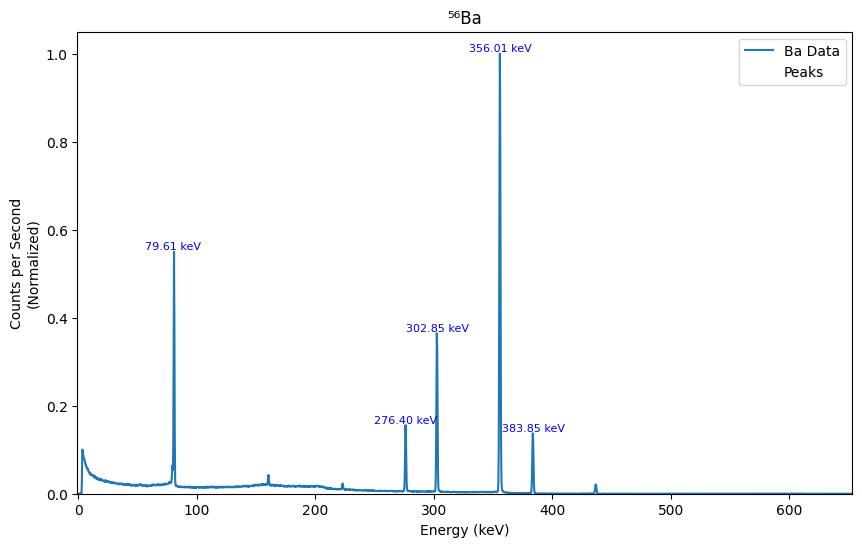

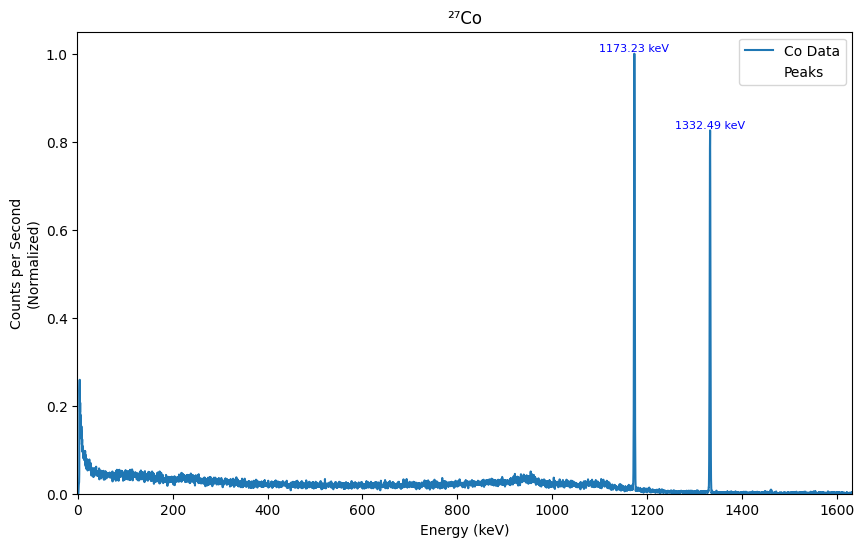

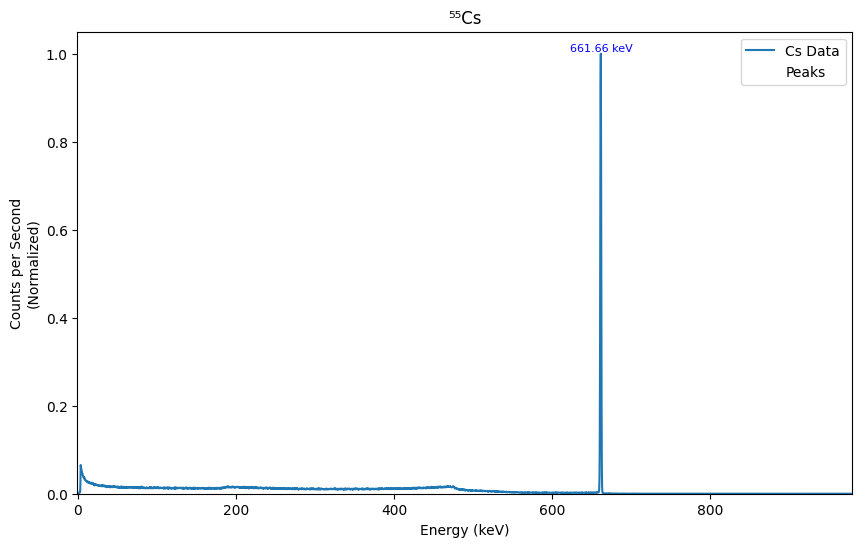

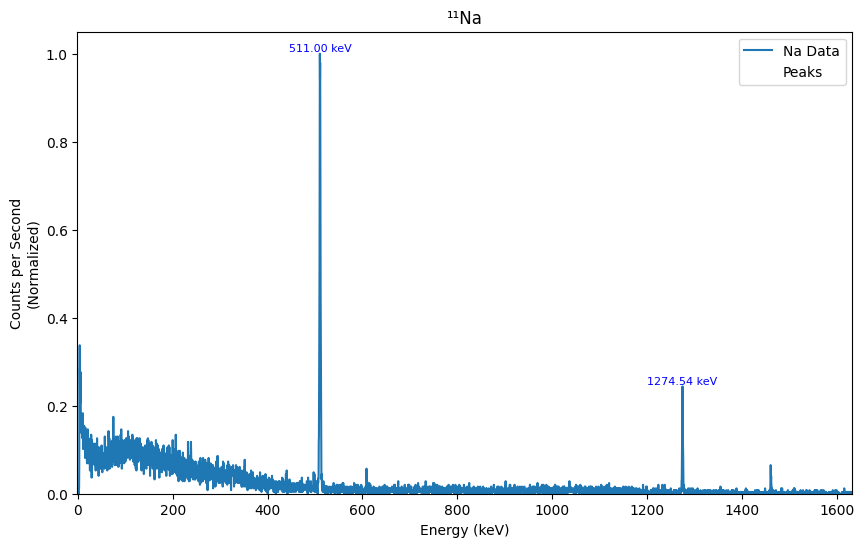

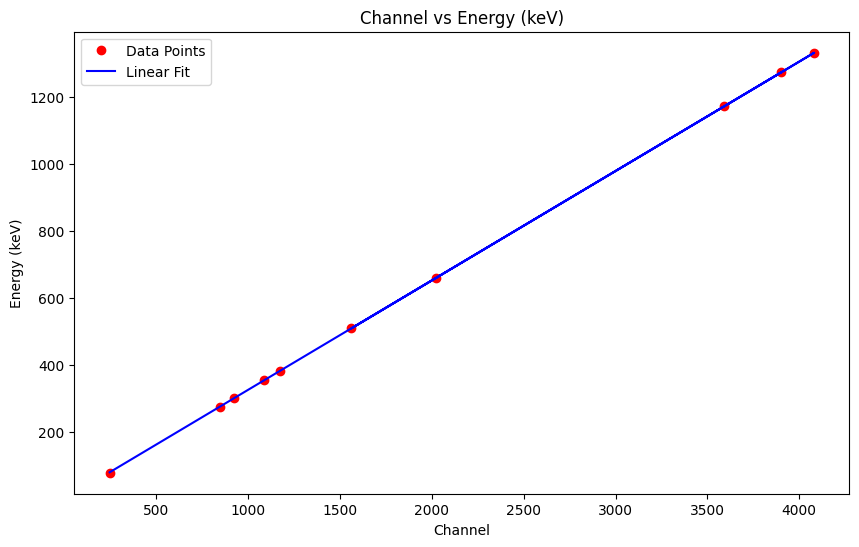

In [11]:
#Input the known peak conditions (in keV)
peak_energies = {
    'Ba': [79.6142, 276.3989, 302.8508, 356.0129, 383.8484],
    'Co': [1173.228, 1332.492],
    'Cs': [661.657],
    'Na': [511.0, 1274.537],
}

print(peaks_dict.keys())


#Add the energy to peaks_dict
for element_name, data in peaks_dict.items():
    if element_name in peak_energies:
        #Ensure the number of energies matches the number of peaks
        if len(peak_energies[element_name]) == len(data):
           peaks_dict[element_name]['Energy (keV)'] = peak_energies[element_name]
        else:
            print(f"Warning: Number of peaks for {element_name} does not match the number of known energies.")

#peaks_dict[element_name] = pd.DataFrame(peaks) 

### For debugging ###
#Show the data for peak_energy_dict
# for element_name, energies in peaks_dict.items():
#     print(f"Element: {element_name}")
#     print(f"Energies (keV): {energies}")
#     print("=" * 50)

all_channels = []
all_energies = []

for element_name, data in peaks_dict.items():
    if element_name in peaks_dict:
        # Get the peak channels
        peak_channels = data['Channel'].to_numpy()
        peak_energies = data['Energy (keV)'].to_numpy()
        peak_counts = data['Counts per Second'].to_numpy()

        if len(peak_channels) == len(peak_energies):
            all_channels.extend(peak_channels)
            all_energies.extend(peak_energies)
        else:
            print(f"Warning: Number of peaks for {element_name} does not match the number of known energies.")
            
        
all_channels = np.array(all_channels)
all_energies = np.array(all_energies)

print("All channels:", all_channels)
print("All energies:", all_energies)

popt, pcov = curve_fit(
    utils.linear, 
    all_channels, 
    all_energies,
    bounds=([-np.inf, 0], [np.inf, np.inf])
)


slope, intercept = popt

print(f"Slope: {slope}, Intercept: {intercept}")

def channel_to_energy(channel):
    return slope * channel + intercept

for element_name, data in normalized_data_dict.items():
    # Add a new column for energy values
    data['Energy (keV)'] = channel_to_energy(data['Channel'])

for element_name, data in data_dict.items():
    # Add a new column for energy values
    data['Energy (keV)'] = channel_to_energy(data['Channel'])

for element_name, data in truncated_data_dict.items():
    # Add a new column for energy values
    data['Energy (keV)'] = channel_to_energy(data['Channel'])
    

# Step 5: Plot normalized data with energy scale
for element_name, data in normalized_data_dict.items():
     if element_name in peaks_dict and not peaks_dict[element_name].empty:
        # Get the peaks data for the current element
        peak_energies = peaks_dict[element_name]['Energy (keV)'].to_numpy()
        peak_counts = peaks_dict[element_name]['Counts per Second'].to_numpy()
        # Plot the data with peaks
        plt.figure(figsize=(10, 6))
        plt.plot(data['Energy (keV)'], data['Counts per Second'], label=f"{element_name} Data")
        plt.scatter(peak_energies, peak_counts, color='red', label="Peaks", zorder=5, s=0)  # Plot peaks as red dots
        # Add labels for each peak
        for x, y in zip(peak_energies, peak_counts):
            plt.text(x, y, f"{x:.2f} keV", fontsize=8, ha='center', va='bottom', color='blue')
        plt.xlabel('Energy (keV)')
        plt.ylabel(f'Counts per Second\n(Normalized)')
        plt.title(data['Display Element Name'].iloc[0])
        plt.legend()
        plt.xlim(left=-data['Energy (keV)'].iloc[0], right=data['Energy (keV)'].max())
        plt.ylim(bottom=0)
        plt.tick_params(axis='both', direction='out')

        # Save the plot
        plt.savefig(f"{output_dir}/{element_name}_with_peaks.png", dpi=300, bbox_inches='tight', pad_inches=0.25)
        plt.show()
        plt.close()


#Plot the linear fit
plt.figure(figsize=(10, 6))
plt.plot(all_channels, all_energies, 'o', label='Data Points', color='red')
plt.xlabel('Channel')
plt.ylabel('Energy (keV)')
plt.title('Channel vs Energy (keV)')
plt.plot(all_channels, utils.linear(all_channels, *popt), 'b-', label='Linear Fit')
plt.legend()
plt.show()

Subtask 2 - resolution determination

In [12]:
#Slice off data to create a Gaussian fit for the Co data around the 1332 keV peak
gaussian_dict = {}
for key, data in truncated_data_dict.items():
    #Get the data for the element
    if key == 'Co':
        #Get the data for the element
        gaussian_data = data.iloc[4000:4160].reset_index(drop=True)
        
        #Add the data to the dictionary
        gaussian_dict[key] = gaussian_data
    else:
        gaussian_dict[key] = None

### For debugging ###
# print(gaussian_dict.keys())
# for element_name, data in gaussian_dict.items():
#     if data is not None:
#         print(f"Data for {element_name}:")
#         print(data.head())  # Display the first 5 rows
#         print("-" * 50)
#     else:
#         print(f"No data for {element_name}.")

In [13]:
# Perform curve fitting
key = 'Co'  # Replace with the specific key you want
if key in gaussian_dict and gaussian_dict[key] is not None:
    x_data = gaussian_dict[key]['Energy (keV)']
    y_data = gaussian_dict[key]['Counts per Second']
    
    # Initial guesses for the parameters: [amplitude, mean, std_dev]
    initial_guess = [y_data.max(), x_data.mean(), np.abs(x_data.std())]
    
    # Perform the curve fit
    popt, pcov = curve_fit(
        utils.gaussian, 
        x_data, 
        y_data, 
        p0=initial_guess,
        bounds=([0, x_data.min(), 0], [np.inf, x_data.max(), np.inf])
        )
    
    # Extract the fitted parameters
    a, x0, sigma = popt
    print(f"Fitted parameters: a={a}, x0={x0}, sigma={sigma}")
else:
    print(f"No data available for key: {key}")


x_fit = np.linspace(min(x_data), max(x_data), 500)
y_fit = utils.gaussian(x_fit, *popt)


Fitted parameters: a=5.836053167633877, x0=1332.7468808433382, sigma=0.8163370107941659


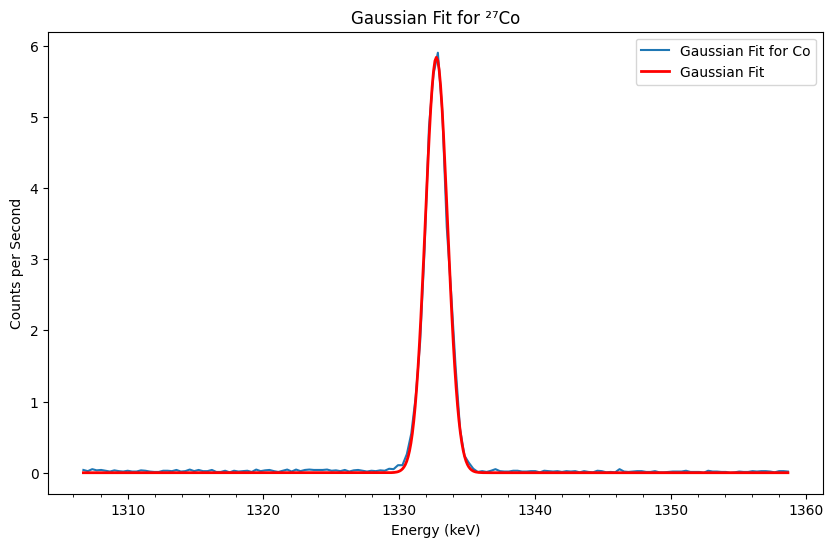

1274.537


In [14]:
#Create a plot of the sliced data for the Gaussian fit

# Ensure the Gaussian fit dataset has data
for key, data in gaussian_dict.items():
    if key == 'Co':
        max_index = data['Counts per Second'].idxmax()
                
        # Create the plot
        plt.figure(figsize=(10, 6))
        plt.plot(data['Energy (keV)'], data['Counts per Second'], label=f"Gaussian Fit for {key}")
        plt.plot(x_fit, y_fit, 'r-', label='Gaussian Fit', linewidth=2)
        plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
        plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(2))
        
        #To show the peak position, for troubleshooting
        #plt.axvline(x=data['Energy (keV)'].iloc[max_index], color='green', linestyle='--', label='Peak Position')
        
        plt.xlabel('Energy (keV)')
        plt.ylabel('Counts per Second')
        plt.title(f"Gaussian Fit for {data['Display Element Name'].iloc[0]}")
        plt.legend()
        #plt.grid(True)
        plt.show()
        print(x)



In [15]:
FWHM = 2 * np.sqrt(2 * np.log(2)) * sigma
print("FWHM:", FWHM)

resolution = FWHM / 1332.492
print("Resolution:", resolution)

FWHM: 1.9223267565187483
Resolution: 0.0014426553829356937


In [16]:
# Save slope and intercept values to a JSON file
calibration_data = {
    "slope": slope,
    "intercept": intercept
}

with open(r"Data\calibration_data.json", "w") as json_file:
    json.dump(calibration_data, json_file)

print("Calibration data saved to calibration_data.json")

Calibration data saved to calibration_data.json


Peak-to-Compton Ratio Calculations

Peak-to-Compton ratio is 39.29928586885956. 
 The compton mean is 0.1501299545159194 and the peak count rate is 5.9. (Peak counts: 1062)


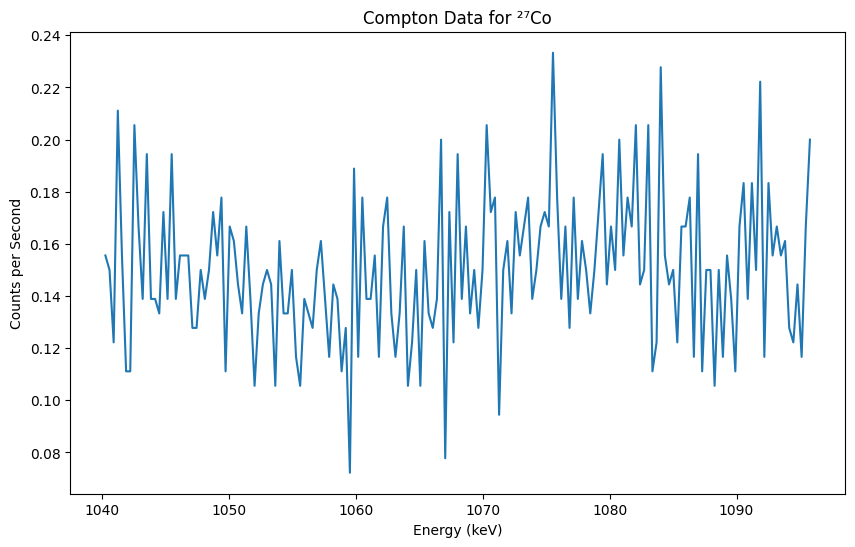

In [17]:
#call the ptc function
ptc_ratio, compton_mean, peak_count_rate, peak_counts, compton_data_slice = utils.peak_to_compton(compton_data=data_dict,
                            gaussian_data=gaussian_dict,
                            element='Co', 
                            compton_range=(1040, 1096)
                            )
print(f'Peak-to-Compton ratio is {ptc_ratio}. \n The compton mean is {compton_mean} and the peak count rate is {peak_count_rate}. (Peak counts: {peak_counts})')

#Create a plot of the compton data
plt.figure(figsize=(10, 6))
plt.plot(compton_data_slice['Energy (keV)'], compton_data_slice['Counts per Second'], label=compton_data_slice['Display Element Name'].iloc[0])
plt.xlabel('Energy (keV)')
plt.ylabel('Counts per Second')
plt.title(f"Compton Data for {compton_data_slice['Display Element Name'].iloc[0]}")
plt.show()
